<a href="https://colab.research.google.com/github/utkarsh-prakash/Google-Colab-Notebooks/blob/main/Seattle_Accident_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Seattle Accidents Analysis


We are using this notebook for data analysis and supervised predictive modelling on historical Seattle accidents data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [ ]:
data = pd.read_csv("Data-Collisions.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print("Total Rows:", len(data))
data["SEVERITYCODE"].value_counts(dropna=False)

Total Rows: 194673


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [ ]:
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
PEDROWNOTGRNT,object,190006
EXCEPTRSNDESC,object,189035
SPEEDING,object,185340
INATTENTIONIND,object,164868
INTKEY,float64,129603
EXCEPTRSNCODE,object,109862
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
X,float64,5334
Y,float64,5334


In [ ]:
# dropping features with more than 50% missing values
data.drop(columns=["PEDROWNOTGRNT", "EXCEPTRSNDESC", "SPEEDING", "INATTENTIONIND", "INTKEY", "EXCEPTRSNCODE"], inplace=True)
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
Y,float64,5334
X,float64,5334
LIGHTCOND,object,5170
WEATHER,object,5081
ROADCOND,object,5012
ST_COLDESC,object,4904
COLLISIONTYPE,object,4904
UNDERINFL,object,4884


### Features and Target columns
<i>SEVERITYCODE</i> - Target Column (1:Property Damage Only Collision, 2:Injury Collision)<br>
<i>SEVERITYCODE.1</i> - Copy of Target Column (drop) <br>
<i>SEVERITYDESC</i> - Description of Target Column (drop) <br>

----------------------------------------------------------------------------------------------------------------------
<i>SDOTCOLNUM</i> - A number given to the collision by SDOT (drop)<br>
<i>JUNCTIONTYPE</i> - Category of junction at which collision took place  <br>
<i>X</i> - Coordinate of accident (drop) <br>
<i>Y</i> - Coordinate of accident (drop) <br>
<i>LIGHTCOND</i> - The light conditions during the collision. <br>
<i>WEATHER</i> - A description of the weather conditions during the time of the collision <br>
<i>ROADCOND</i> - The condition of the road during the collision <br>
<i>ST_COLDESC</i> - A description that corresponds to the state's coding designation (drop-Equivalent to ST_COLCODE) <br>
<i>COLLISIONTYPE</i> - Collision type <br>
<i>UNDERINFL</i> - Whether or not a driver involved was under the influence of drugs or alcohol (0/1) <br>
<i>LOCATION</i> - Description of the general location of the collision/address (drop) <br>
<i>ADDRTYPE</i> - Collision address type (Alley, Block, Intersection) <br>
<i>ST_COLCODE</i> - A code provided by the state that describes the collision <br>
<i>SDOT_COLDESC</i> - A description of the collision corresponding to the collision code (drop-Equivalent to SDOT_COLCODE) <br>
<i>SEGLANEKEY</i> - A key for the lane segment in which the collision occurred <br>
<i>CROSSWALKKEY</i> - A key for the crosswalk at which the collision occurred <br>
<i>SDOT_COLCODE</i> - A code given to the collision by SDOT <br>
<i>VEHCOUNT</i> - The number of vehicles involved in the collision <br>
<i>INCDTTM</i> - The date and time of the incident (drop) <br>
<i>INCDATE</i> - The date of the incident (drop) <br>
<i>PEDCYLCOUNT</i> - The number of bicycles involved in the collision <br>
<i>PEDCOUNT</i> - The number of pedestrians involved in the collision <br>
<i>PERSONCOUNT</i> - The total number of people involved in the collision <br>
<i>STATUS</i> - (Matches, Unmatched) *** (drop - Highly unbalanced) <br>
<i>REPORTNO</i> - Report identifier (drop) <br>
<i>COLDETKEY</i> - Secondary Key for incident (drop) <br>
<i>INCKEY</i> - Unique key for incident (drop) <br>
<i>OBJECTID</i> - ESRI unique identifier (drop) <br>
<i>HITPARKEDCAR</i> - Whether or not the collision involved hitting a parked car <br>

In [ ]:
# Checking the severitycode and its related columns
print(sum(data["SEVERITYCODE"] == data["SEVERITYCODE.1"]), "rows matched.")
ref = {"Property Damage Only Collision":1, "Injury Collision":2}
print(sum(data["SEVERITYCODE"] == data["SEVERITYDESC"].apply(lambda x: ref[x])), "rows matched.")

194673 rows matched.
194673 rows matched.


In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


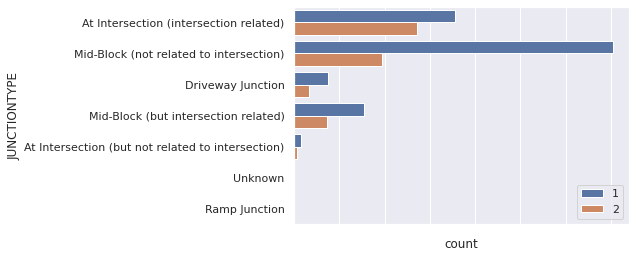

In [ ]:
ax = sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

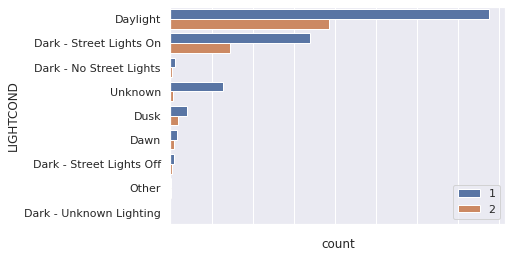

In [ ]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

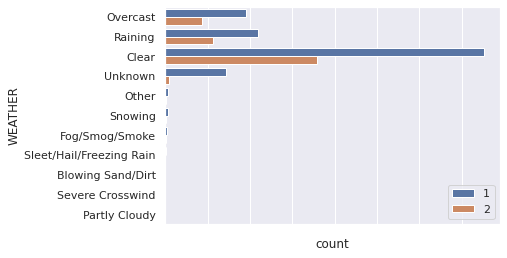

In [ ]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

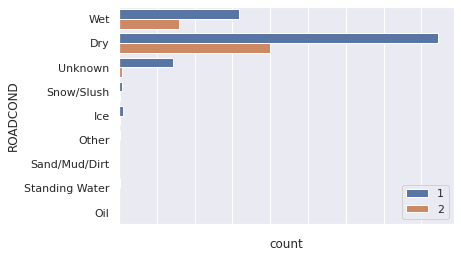

In [ ]:
ax = sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

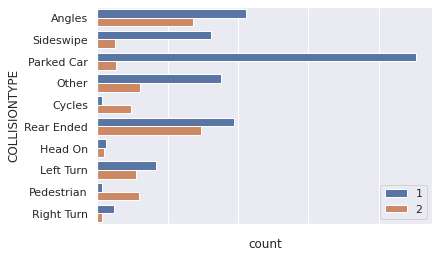

In [ ]:
ax = sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

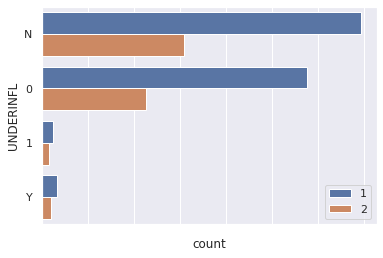

In [ ]:
# Y and N needs to be mapped to 1 and 0, this will be part of data processing after train test split
ax = sns.countplot(y="UNDERINFL", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

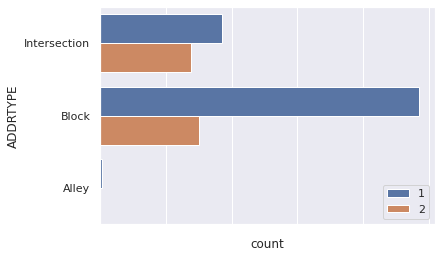

In [ ]:
ax = sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Convert the strings into int, this will be part of data processing after train test split
data["ST_COLCODE"].unique()

array(['10', '11', '32', '23', '5', '22', '14', '30', ' ', '28', '51',
       '13', '50', '12', '45', '0', '20', '21', '1', '52', '16', '15',
       '74', '81', '26', '19', '2', '66', '71', '3', '24', '40', '57',
       '6', '83', '25', '27', '4', '72', '29', '56', '73', '41', '17',
       '65', '82', '67', '49', '84', '31', '43', '42', '48', '64', '53',
       32, 50, 15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30,
       16, 40, 26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73,
       74, 72, 3, 84, 64, 57, 42, 41, 48, 66, 56, 31, 82, 67, '54', '60',
       53, 43, 87, 54, '87', nan, '7', '8', '85', '88', '18'],
      dtype=object)

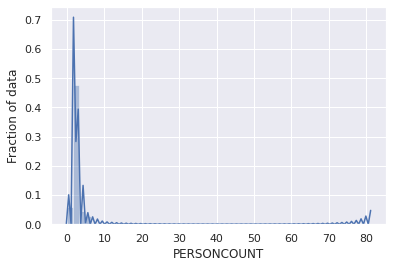

In [ ]:
ax = sns.distplot(data["PERSONCOUNT"])
plt.ylabel("Fraction of data")
plt.show()

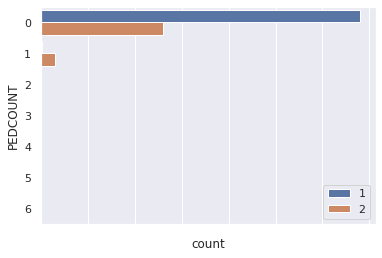

In [ ]:
ax = sns.countplot(y="PEDCOUNT", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

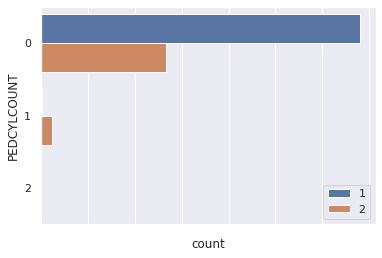

In [ ]:
ax = sns.countplot(y="PEDCYLCOUNT", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

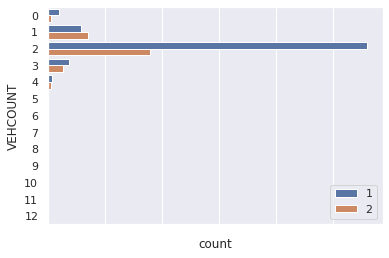

In [ ]:
ax = sns.countplot(y="VEHCOUNT", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64


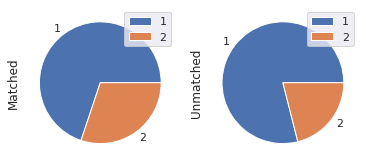

In [ ]:
print(data["STATUS"].value_counts())
df = data.groupby(by=["STATUS", "SEVERITYCODE"]).count()["OBJECTID"]
df.unstack().transpose().plot.pie(subplots=True)
plt.show()

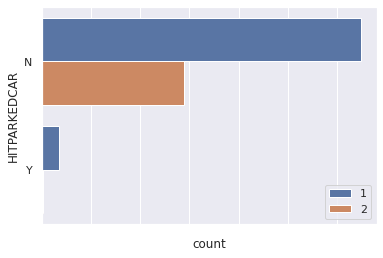

In [ ]:
ax = sns.countplot(y="HITPARKEDCAR", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(len(data))

194673


In [ ]:
import folium
from folium import plugins

coord_df = data[['X', 'Y', 'SEVERITYCODE']].copy()
coord_df = coord_df.dropna()
coord_df = coord_df.loc[:20000, :]
coord_df['SEVERITYCODE'] = coord_df['SEVERITYCODE'].astype(str) 

latitude = 47.6
longitude = -122.33
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

incidents = plugins.MarkerCluster().add_to(seattle_map)

for lat, lng, label, in zip(coord_df.Y, coord_df.X, coord_df.SEVERITYCODE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map

In [ ]:
import folium
from folium import plugins

coord_df = data[['X', 'Y', 'SEVERITYCODE']].copy()
coord_df = coord_df.dropna()
coord_df = coord_df.loc[20000:40000, :]
coord_df['SEVERITYCODE'] = coord_df['SEVERITYCODE'].astype(str) 

latitude = 47.6
longitude = -122.33
seattle_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

incidents = plugins.MarkerCluster().add_to(seattle_map)

for lat, lng, label, in zip(coord_df.Y, coord_df.X, coord_df.SEVERITYCODE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
seattle_map

In [ ]:
plt.show()

In [ ]:
print(len(data))

In [ ]:
# Lets drop the columns which are not usefull for our model.
drop_cols = ["SEVERITYCODE.1", "SEVERITYDESC", "SDOTCOLNUM", "X", "Y", "ST_COLDESC", "LOCATION", "SDOT_COLDESC", 
             "INCDTTM", "INCDATE", "REPORTNO", "COLDETKEY", "INCKEY", "OBJECTID", "STATUS"]
data.drop(columns=drop_cols, inplace=True)
data.head()

In [ ]:
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

### Train Test Split

In [ ]:
data_y = data[["SEVERITYCODE"]]
data_X = data.drop(columns=["SEVERITYCODE"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30, random_state=42, stratify=data_y, shuffle=True)

### Data Processing

In [ ]:
pd.options.mode.chained_assignment = None
X_train["UNDERINFL"] = X_train["UNDERINFL"].apply(lambda x: 'N' if x=='0' else 'Y' if x=='1' else x)
X_train["UNDERINFL"].value_counts()

In [ ]:
import math
X_train["ST_COLCODE"] = X_train["ST_COLCODE"].apply(lambda x: np.nan if x==' ' else int(x) if isinstance(x, str) else x)
X_train["ST_COLCODE"].unique()

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
print("Total distribution of training data:")
print(train['SEVERITYCODE'].value_counts())
print("")
print("Total distribution of missing data we are planning to drop:")
print(train[train.isna().any(axis=1)]['SEVERITYCODE'].value_counts())

In [ ]:
# It seems safe to drop the missing data rows as the proportion of data dropped is okay
train = train.dropna()
y_train = train[["SEVERITYCODE"]]
X_train = train.drop(columns=["SEVERITYCODE"])
pd.concat([train.dtypes, train.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

In [ ]:
#Preparing X and Y for modelling
y_train = y_train.values.ravel()
X_train.reset_index(drop=True, inplace=True)

In [ ]:
# Features with many categories, pending to experiment with
print("Feature SEGLANEKEY, training categories:",len(X_train["SEGLANEKEY"].unique()))
print("Feature CROSSWALKKEY, training categories:",len(X_train["CROSSWALKKEY"].unique()))
print("Feature SDOT_COLCODE, training categories:",len(X_train["SDOT_COLCODE"].unique()))
print("Feature ST_COLCODE, training categories:",len(X_train["ST_COLCODE"].unique()))
#X_train.drop(columns=["SEGLANEKEY", "CROSSWALKKEY", "SDOT_COLCODE", "ST_COLCODE"], inplace=True)

In [ ]:
X_train["HITPARKEDCAR"] = X_train["HITPARKEDCAR"].apply(lambda x: 1 if x=='Y' else 0)
X_train["UNDERINFL"] = X_train["UNDERINFL"].apply(lambda x: 1 if x=='Y' else 0)

In [ ]:
# One Hot Encoding
oh_encodings = {}
def one_hot(df, cols):
    global oh_encodings
    for col in cols:
        dummy = pd.get_dummies(df[col], prefix=col)
        if col+"_Unknown" in dummy.columns:
            dummy.drop(columns=[col+"_Unknown"], inplace=True)
        elif col+"_Others" in dummy.columns:
            dummy.drop(columns=[col+"_Other"], inplace=True)
        else:
            dummy.drop(columns=[dummy.columns[-1]], inplace=True)
        oh_encodings[col] = list(dummy.columns)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)  
    return df

In [ ]:
# Feature Hashing for very high cardinality nominal features
hashing_dict = {}
from copy import deepcopy
from sklearn.feature_extraction import FeatureHasher
def featurehash(df, cols):
    global hashing_dict
    fh = FeatureHasher(n_features=30, input_type='string')
    for col in cols:
        df[col] = df[col].astype(str)
        hashed_features = fh.fit_transform(df[col])
        fh_fit = deepcopy(fh)
        hashing_dict[col] = fh_fit
        hashed_features = hashed_features.toarray()
        dummy = pd.DataFrame(hashed_features)
        for name in dummy.columns:
            dummy.rename(columns={name:col+'_'+str(name)}, inplace=True)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)
    return df

In [ ]:
X_train.head()

In [ ]:
oh_cols = ["ADDRTYPE", "WEATHER", "LIGHTCOND", "ROADCOND", "COLLISIONTYPE", "JUNCTIONTYPE","SDOT_COLCODE", "ST_COLCODE"]
X_train = one_hot(X_train, oh_cols)
hash_cols = ["SEGLANEKEY", "CROSSWALKKEY"]
X_train = featurehash(X_train, hash_cols)
X_train.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
importance = model.feature_importances_
# summarize feature importance
less_imp = pd.DataFrame(columns=["Feature", "Importance"]) 
for i,v in enumerate(importance):
    less_imp = less_imp.append({"Feature":X_train.columns[i], "Importance":v}, ignore_index=True)
less_imp.sort_values(by=["Importance"], inplace=True)
less_imp.iloc[:40, :]

In [ ]:
# Dropping 10 least important features
X_train.drop(columns=less_imp.iloc[:40, :]["Feature"].to_list(), inplace=True)

In [ ]:
corr = X_train.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center= 0)

In [ ]:
# Finding features with > 90% correlation
import itertools
for i, j in itertools.combinations(corr.columns, 2):
    if abs(corr.loc[i, j])>0.90:
        print(i,j, corr.loc[i, j])

In [ ]:
# Dropping these highly correlated columns
X_train.drop(columns=["COLLISIONTYPE_Pedestrian", "COLLISIONTYPE_Cycles", "JUNCTIONTYPE_At Intersection (intersection related)", 
                      "SDOT_COLCODE_24", "ST_COLCODE_45.0", "ST_COLCODE_10.0", "ST_COLCODE_32.0", "ST_COLCODE_16.0"], inplace=True)

### Modelling

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve, roc_auc_score

In [ ]:
rnf = RandomForestClassifier(random_state = 42)
train_predicted = cross_val_predict(rnf, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, train_predicted)
print("Model: Random Forest")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,train_predicted))

In [ ]:
xgb_clf = XGBClassifier(random_state = 42)
train_predicted = cross_val_predict(xgb_clf, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, train_predicted)
print("Model: XG Boost")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,train_predicted))

In [ ]:
# Not Using Oversampling for now as it is decreasing accuracy and not improving f1 very much.

# Scoring with oversampling to remove imballance
from sklearn.model_selection import StratifiedKFold 
from imblearn.over_sampling import SMOTE

kf = StratifiedKFold(n_splits=10)
cv_actual = []
cv_pred = []
X_train_numpy = X_train.to_numpy()

for fold, (train_index, test_index) in enumerate(kf.split(X_train_numpy, y_train), 1):
    X_train_cv = X_train_numpy[train_index]
    y_train_cv = y_train[train_index]
    X_test_cv = X_train_numpy[test_index]
    y_test_cv = y_train[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train_cv, y_train_cv)
    model = xgb_clf
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test_cv)
    cv_pred.extend(y_pred)
    cv_actual.extend(y_test_cv)

accuracy = accuracy_score(cv_actual, cv_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(cv_actual,cv_pred))

### Hyperparameter Tuning of XG Boost

In [ ]:
from sklearn.model_selection import GridSearchCV
# max_depth - Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
# min_child_weight - Minimum sum of instance weight (hessian) needed in a child.

xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=140, max_depth=6, 
                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1)

param_test1 = {'max_depth':range(5,8,1), 'min_child_weight':range(3,6,1)}

grid_search1 = GridSearchCV(estimator=xgb_clf, param_grid=param_test1, scoring='roc_auc', n_jobs=4, cv=5, verbose=True)

grid_search1.fit(X_train,y_train)
print(grid_search1.best_params_, grid_search1.best_score_)

In [ ]:
# gamma/min_split_loss - Minimum loss reduction required to make a further partition on a leaf node of the tree. 
# The larger gamma is, the more conservative the algorithm will be.

param_test2 = {'gamma':[i/10.0 for i in range(0,3)]}

xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=140, max_depth=6, 
                        min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1)

grid_search2 = GridSearchCV(estimator=xgb_clf, param_grid=param_test2, scoring='roc_auc', n_jobs=4, cv=5, verbose=True)

grid_search2.fit(X_train,y_train)
print(grid_search2.best_params_, grid_search2.best_score_)

In [ ]:
# subsample - Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. 
# and this will prevent overfitting.Subsampling will occur once in every boosting iteration.

# colsample_bytree - Parameter for subsampling of columns. The subsample ratio of columns when constructing each tree. 
# Subsampling occurs once for every tree constructed.

param_test3 = {'subsample':[i/10.0 for i in range(6,9)], 'colsample_bytree':[i/10.0 for i in range(6,9)]}

xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=140, max_depth=6, 
                        min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1)

grid_search3 = GridSearchCV(estimator=xgb_clf, param_grid=param_test3, scoring='roc_auc', n_jobs=4, cv=5, verbose=True)

grid_search3.fit(X_train,y_train)
print(grid_search3.best_params_, grid_search3.best_score_)

In [ ]:
# alpha/reg_alpha - L1 regularization term on weights. Increasing this value will make model more conservative.
# lambda/reg_lambda - L2 regularization term on weights. Increasing this value will make model more conservative.

param_test4 = {'reg_alpha':[0.5, 1, 10], 'reg_lambda':[0.00005, 0.05, 0.1]}

xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=140, max_depth=6, reg_alpha=1,
                        min_child_weight=4, gamma=0, subsample=0.7, colsample_bytree=0.7, 
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, reg_lambda=0.05)

grid_search4 = GridSearchCV(estimator=xgb_clf, param_grid=param_test4, scoring='roc_auc', n_jobs=4, cv=5, verbose=True)

grid_search4.fit(X_train,y_train)
print(grid_search4.best_params_, grid_search4.best_score_)

In [ ]:
# eta/learning_rate - Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, 
# and eta shrinks the feature weights to make the boosting process more conservative.

param_test5 = {'learning_rate':[0.05, 0.1, 0.3], 'n_estimators':[160, 170, 180]}

xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=170, max_depth=6, reg_alpha=1,
                        min_child_weight=4, gamma=0, subsample=0.7, colsample_bytree=0.7, 
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, reg_lambda=0.05)

grid_search5 = GridSearchCV(estimator=xgb_clf, param_grid=param_test5, scoring='roc_auc', n_jobs=4, cv=5, verbose=True)

grid_search5.fit(X_train,y_train)
print(grid_search5.best_params_, grid_search5.best_score_)

In [ ]:
xgb_clf = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=170, max_depth=6, reg_alpha=1, 
                        min_child_weight=4, gamma=0, subsample=0.7, colsample_bytree=0.7, objective= 'binary:logistic', 
                        nthread=4, scale_pos_weight=1, reg_lambda=0.05)
train_predicted = cross_val_predict(xgb_clf, X_train, y_train, cv=5)
accuracy = accuracy_score(y_train, train_predicted)
print("Model: XG Boost")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_train,train_predicted))

In [ ]:
final_model = XGBClassifier(random_state = 42, learning_rate =0.1, n_estimators=170, max_depth=6, reg_alpha=1, 
                            min_child_weight=4, gamma=0, subsample=0.7, colsample_bytree=0.7, 
                            objective= 'binary:logistic', nthread=4, scale_pos_weight=1, reg_lambda=0.05)
final_model.fit(X_train, y_train)

### Learning Curve

In [ ]:
#Plotting Learning curve wrt xgboost model

from sklearn.model_selection import learning_curve
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return plt
cv = 10
train_size=np.linspace(.1, 1.0, 15)
Learning_curve_model(X_train, y_train, final_model, cv, train_size)

In [ ]:
# # Plotting Learning curve wrt xgboost model and oversampling INSIDE the cross validation

# # from sklearn.pipeline import sk_Pipeline
# # sklearn.pipeline.Pipeline will not handle the sample() method of SMOTE, but imblearn.pipeline.Pipeline will
# # imblearn.pipeline.Pipeline only calls fit_sample on fit() and never on predict()
# from imblearn.pipeline import Pipeline
# xgboost_smote_pipeline = Pipeline(steps=[('sampling', SMOTE()),
#                                          ('classifier', xgb_clf)])

# cv = 10
# train_size=np.linspace(.1, 1.0, 15)
# Learning_curve_model(X_train, y_train, xgboost_smote_pipeline, cv, train_size)

### Prediction on Test Data


In [ ]:
def one_hot_test(df):
    global oh_encodings
    for col, encodes in oh_encodings.items():
        for encode in encodes:
            category = encode.split('_')[1]
            df[encode] = df[col].apply(lambda x: 1 if x==category else 0)
        df.drop(columns=[col], inplace = True)
    return df

In [ ]:
def featurehashing_test(df):
    global hashing_dict
    for col, fh in hashing_dict.items():
        df[col] = df[col].astype(str)
        hashed_features = fh.transform(df[col])
        hashed_features = hashed_features.toarray()
        dummy = pd.DataFrame(hashed_features)
        for name in dummy.columns:
            dummy.rename(columns={name:col+'_'+str(name)}, inplace=True)
        df = pd.concat([df, dummy], axis=1)
        df.drop(columns=[col], inplace = True)
    return df

In [ ]:
def preprocessing(df):
    global less_imp
    df["UNDERINFL"] = df["UNDERINFL"].apply(lambda x: 'N' if x=='0' else 'Y' if x=='1' else x)
    df["ST_COLCODE"] = df["ST_COLCODE"].apply(lambda x: np.nan if x==' ' else int(x) if isinstance(x, str) else x)
    df["HITPARKEDCAR"] = df["HITPARKEDCAR"].apply(lambda x: 1 if x=='Y' else 0)
    df["UNDERINFL"] = df["UNDERINFL"].apply(lambda x: 1 if x=='Y' else 0)
    df = one_hot_test(df)
    df = featurehashing_test(df)
    df.drop(columns=less_imp.iloc[:40, :]["Feature"].to_list(), inplace=True)
    df.drop(columns=["COLLISIONTYPE_Pedestrian", "COLLISIONTYPE_Cycles", 
                     "JUNCTIONTYPE_At Intersection (intersection related)", "SDOT_COLCODE_24", 
                     "ST_COLCODE_45.0", "ST_COLCODE_10.0", "ST_COLCODE_32.0", "ST_COLCODE_16.0"], inplace=True)
    return df

In [ ]:
y_test = y_test.values.ravel()
X_test.reset_index(drop=True, inplace=True)
X_test = preprocessing(X_test)

In [ ]:
prediction = final_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print("Final Result")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Report:")
print(classification_report(y_test,prediction))

In [ ]:
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, prediction))